# Catena Elettronica Completa Data Analysis

***
***

## TO DO LIST

- [x] Associare un errore alle misure dirette
- [x] Calcolare le stime teoriche delle quantità rilevanti
- [ ] Controllare che l'apparato sperimentale risponda secondo le aspettative
- [x] Verificare la linearità della catena elettronica
- [x] Stimo la frequenza di taglio della risposta in frequenza con _THEBODE_
- [ ] Verifico che tale stima sia compatibile con le aspettative

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import importlib
import Catena_Analysis_Code as CA
import Shaper_Analysis_Code as SA

In [3]:
importlib.reload(CA)

<module 'Catena_Analysis_Code' from 'd:\\GitHub\\physics_laboratory_2020_2021\\CATENA ELETTRONICA\\Python\\Catena_Analysis_Code.py'>

In [4]:
componenti = CA.misure_dirette()
componenti

,Valore,Errore,FS
R1a,9.982 kΩ,0.006 kΩ,100 kΩ
R2a,82.39 kΩ,0.03 kΩ,100 kΩ


In [5]:
CA.get_G_th()
CA.get_Vshaper_sper()
CA.get_Vcatena_th()
CA.get_Vcatena_sper()
CA.get_Vcatena_comp()

Amplificazione teorica   G = 9.254 +/- 0.004
V_shaper_sper = 0.260 +/- 0.004
V_catena_th = 2.41 +/- 0.04
V_catena_sper = 2.32 +/- 0.04
Compatibilità λ = 1.51


## Verifica della Linearità della Catena Elettronica

***

In [18]:
data = CA.make_dataframe()
CA.max_values_calib(data)
data

,max_values,charge,err_charge,V (V),err V (V)
0,1418,35.994626,0.889840,0.524641,0.022236
1,1728,53.991938,1.334760,0.776794,0.026063
2,2046,71.989251,1.779680,1.035455,0.030113
3,2367,89.986564,2.224600,1.296555,0.034283
4,2688,107.983877,2.669521,1.557656,0.038509
5,3006,125.981189,3.114441,1.816316,0.042734
6,3329,143.978502,3.559361,2.079043,0.047054
7,3654,161.975815,4.004281,2.343397,0.051422
8,3980,179.973128,4.449201,2.608565,0.055821


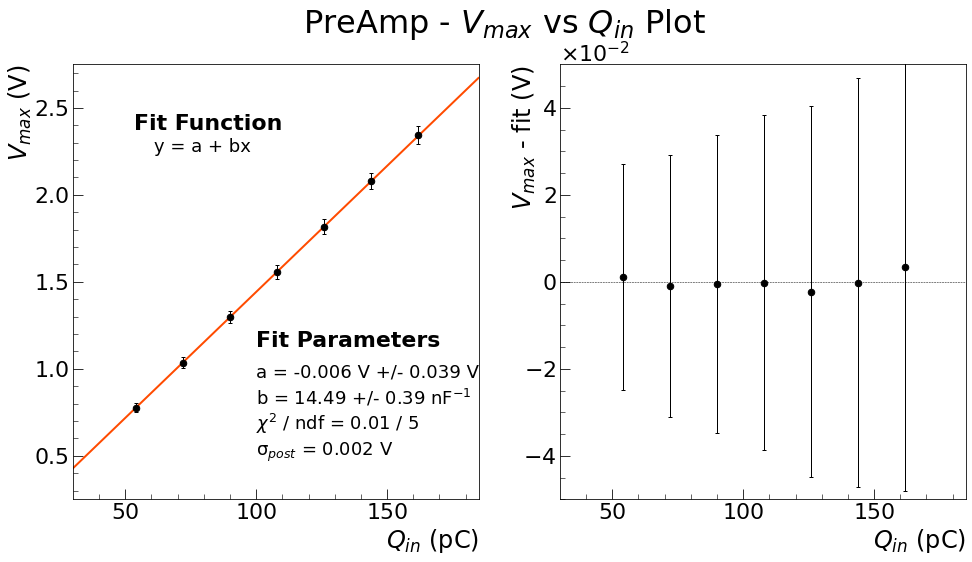

In [19]:
CA.linearity_plot(data)

C'è qualche problemino di calibrazione e di assegnazione degli errori... La linearità della catena è comunque verificata!

## Analisi in Frequenza &rarr; _THEBODE_

*** 

In [3]:
# READ DATA FROM FILE
data = CA.get_data('../Data/Catena/data_bode.txt')
data.columns = ['freq (Hz)', 'Vin (V)', 'Vout (V)', 'Vin/div', 'Vout/div']

# CALCOLO FUNZIONE DI TRASFERIMENTO ED ERRORE
data['T'] = data['Vout (V)'] / data['Vin (V)']
data['sigma T'] = CA.propagazione_T(data['T'], data['Vin (V)'], data['Vout (V)'], data['Vin/div'], data['Vout/div'])
data['sigma Tr'] = CA.propagazione_Tr(data['T'], data['Vin (V)'], data['Vout (V)'], data['Vin/div'], data['Vout/div'])

# CALCOLO I LOGARITMI PER BODE
data['log10f (dec)'] = np.log10(data['freq (Hz)'])
data['H (dB)'] = 20 * np.log10(data['T'])

# PROPAGO L'ERRORE AI LOGARITMI
data['sigma H (dB)'] = 20 * data['sigma T'] / ( data['T'] * np.log(10) )
data['sigma Hr (dB)'] = 20 * data['sigma Tr'] / ( data['T'] * np.log(10) )

data_out = data.drop(axis = 0, labels = 21) # tolgo un brutto outlier
data_out

,freq (Hz),Vin (V),Vout (V),Vin/div,Vout/div,T,sigma T,sigma Tr,log10f (dec),H (dB),sigma H (dB),sigma Hr (dB)
1,10,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,1.000000,20.084741,0.207707,0.095876
2,50,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,1.698970,20.084741,0.207707,0.095876
3,100,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,2.000000,20.084741,0.207707,0.095876
4,250,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,2.397940,20.084741,0.207707,0.095876
5,500,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,2.698970,20.084741,0.207707,0.095876
6,1000,1.02,10.100,0.2,2.00,9.901961,0.237287,0.110376,3.000000,19.914424,0.208145,0.096821
7,2000,1.02,9.840,0.2,2.00,9.647059,0.231853,0.108979,3.301030,19.687899,0.208753,0.098121
8,3000,1.02,9.360,0.2,2.00,9.176471,0.221867,0.106449,3.477121,19.253514,0.210006,0.100759
9,4000,1.02,8.880,0.2,2.00,8.705882,0.211944,0.103990,3.602060,18.796256,0.211458,0.103751
10,5000,1.02,8.240,0.2,2.00,8.078431,0.198830,0.100827,3.698970,18.146541,0.213781,0.108408


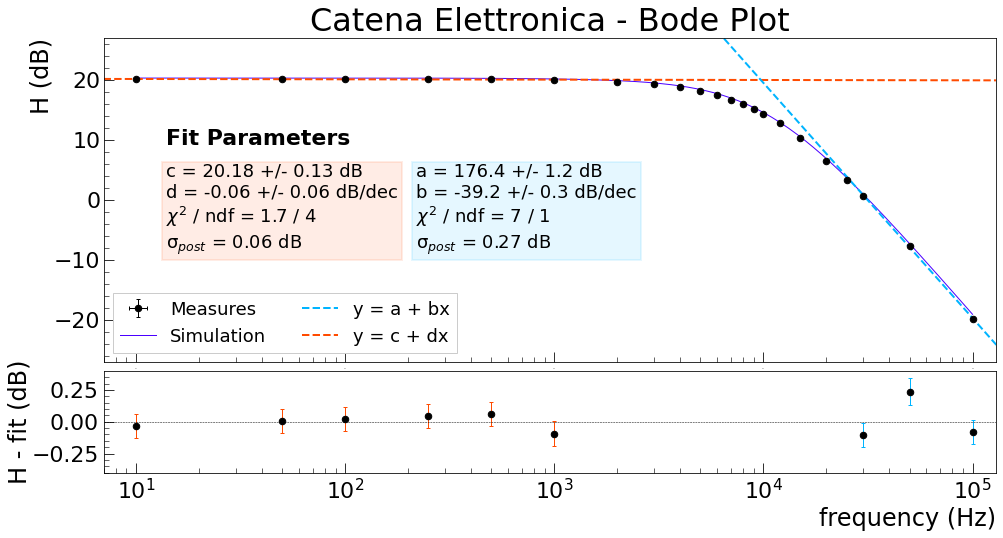

In [22]:
simulation = CA.get_bode_sim('../Simulations/catena/Data/Catena_frequency.txt')
CA.bode_plot(data_out, simulation)

In [15]:
CA.freq_taglio_bode()

Frequenza di Taglio Bode ft_bode = 9.72 +/- 0.13  kHz


In [6]:
ft_th = 10027.205645780974
err_ft_th = 403.74341324124003
ft_bode_sh = 9641.726996506091
err_ft_bode_sh = 234.7933682094829


In [17]:
CA.ft_bode
CA.sigma_ft_bode

129.983945639524

In [19]:
CA.compatib(ft_bode_sh, CA.ft_bode, err_ft_bode_sh, CA.sigma_ft_bode)

0.2992563337741505

In [20]:
CA.compatib(ft_th, CA.ft_bode, err_ft_th, CA.sigma_ft_bode)

0.7194750966182897

In [24]:
importlib.reload(CA)
importlib.reload(SA)

<module 'Shaper_Analysis_Code' from 'd:\\GitHub\\physics_laboratory_2020_2021\\CATENA ELETTRONICA\\Python\\Shaper_Analysis_Code.py'>

In [25]:
def propagazione_cursori(Vdiv, measure):

    sigma = np.sqrt( (0.04 * Vdiv)**2 + (0.015 * measure)**2)

    return sigma

def lin(x, a, b):  
    return a + b * x

In [26]:
# OSC DATA
file_in =  '../Data/PreAmp/calib_in_18.txt'
file_vdiv =  '../Data/PreAmp/calib_in_vdiv_18.txt'

# ARDUINO DATA
file1 = '../Data/PreAmp/calib_02_18_ROOT.dat'
file2 = '../Data/PreAmp/calib_05_18_ROOT.dat'
file3 = '../Data/PreAmp/calib_08_18_ROOT.dat'
file4 = '../Data/PreAmp/calib_10_18_ROOT.dat'
file5 = '../Data/PreAmp/calib_12_18_ROOT.dat'
file6 = '../Data/PreAmp/calib_15_18_ROOT.dat'
file7 = '../Data/PreAmp/calib_18_18_ROOT.dat'
file8 = '../Data/PreAmp/calib_20_18_ROOT.dat'
file9 = '../Data/PreAmp/calib_21_18_ROOT.dat'
file10 = '../Data/PreAmp/calib_22_18_ROOT.dat'
file11 = '../Data/PreAmp/calib_23_18_ROOT.dat'
file12 = '../Data/PreAmp/calib_24_18_ROOT.dat'
file13 = '../Data/PreAmp/calib_25_18_ROOT.dat'

# READ ARDUINO DATA
data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']
data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']
data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']
data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']
data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']
data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']
data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']
data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']
data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']
data10 = pd.read_csv(file10, sep = ' ', index_col = False, header = None)
data10.index = np.arange(1, len(data10)+1)
data10.columns = ['time', 'ADC']
data11 = pd.read_csv(file11, sep = ' ', index_col = False, header = None)
data11.index = np.arange(1, len(data11)+1)
data11.columns = ['time', 'ADC']
data12 = pd.read_csv(file12, sep = ' ', index_col = False, header = None)
data12.index = np.arange(1, len(data12)+1)
data12.columns = ['time', 'ADC']
data13 = pd.read_csv(file13, sep = ' ', index_col = False, header = None)
data13.index = np.arange(1, len(data13)+1)
data13.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()
max10 = data10['ADC'].max()
max11 = data11['ADC'].max()
max12 = data12['ADC'].max()
max13 = data13['ADC'].max()
max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9, max10, max11, max12, max13])

# READ OSC DATA
Vin = np.loadtxt(file_in)
Vdiv = np.loadtxt(file_vdiv)

# MAKE DATAFRAME
data = pd.DataFrame({'max_values': list(max_values), 'Vin': list(Vin), 'Vdiv': list(Vdiv)}, columns = ['max_values', 'Vin', 'Vdiv'])

# ERROR PROPAGATION ON OSC DATA
data['err Vin'] = propagazione_cursori(data['Vdiv'], data['Vin'])

# SELECT RELEVANT DATAPOINTS
data = data.iloc[:,:]

# SHOW DATA
data

,max_values,Vin,Vdiv,err Vin
0,1019,0.206,0.050,0.003681
1,1383,0.512,0.100,0.008659
2,1765,0.824,0.200,0.014723
3,2019,1.020,0.200,0.017265
4,2289,1.230,0.200,0.020110
5,2680,1.540,0.304,0.026105
6,3080,1.860,0.304,0.030435
7,3355,2.040,0.352,0.033684
8,3500,2.150,0.352,0.035190
9,3636,2.260,0.376,0.037087


In [27]:
# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = data['max_values'], ydata = data['Vin'], sigma = data['err Vin'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a_calib = fit_par[0]
b_calib = fit_par[1]
err_a_calib = fit_err[0]
err_b_calib = fit_err[1]
cov_ab = cov[0][1]

# PRINT CALIBRATION FUNCTION
print(
        'VOLT = ' +  ' (' + format(a_calib, '.3f') + ' +/- ' + format(err_a_calib, '.3f') + ') ' + ' + ' 
        + ' (' + format(b_calib, '.6f') + ' +/- ' + format(err_b_calib, '.6f') + ') ' + ' ADC'
    )

VOLT =  (-0.596 +/- 0.007)  +  (0.000791 +/- 0.000005)  ADC


In [28]:
def calib(data):

    data['V (V)'] = a_calib + b_calib * data['ADC']

    data['err V (V)'] = 4 * 3.3 * 0.58 / 4096

In [29]:
# READ DATA
file1 = '../Data/Catena/catena_2us_ROOT.dat'
file2 = '../Data/Catena/catena_3us_ROOT.dat'
file3 = '../Data/Catena/catena_4us_ROOT.dat'
file4 = '../Data/Catena/catena_5us_ROOT.dat'
file5 = '../Data/Catena/catena_6us_ROOT.dat'
file6 = '../Data/Catena/catena_7us_ROOT.dat'
file7 = '../Data/Catena/catena_8us_ROOT.dat'
file8 = '../Data/Catena/catena_9us_ROOT.dat'
file9 = '../Data/Catena/catena_10us_ROOT.dat'
data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']
data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']
data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']
data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']
data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']
data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']
data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']
data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']
data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']

In [30]:
calib(data1)
calib(data2)
calib(data3)
calib(data4)
calib(data5)
calib(data6)
calib(data7)
calib(data8)
calib(data9)

In [31]:
max1 = data1['V (V)'].max() - data1['V (V)'].min()  - 0.176

max2 = data2['V (V)'].max() - data2['V (V)'].min()  - 0.176
max3 = data3['V (V)'].max() - data3['V (V)'].min()  - 0.176
max4 = data4['V (V)'].max() - data4['V (V)'].min()  - 0.176
max5 = data5['V (V)'].max() - data5['V (V)'].min()  - 0.176

max6 = data6['V (V)'].max() - data6['V (V)'].min() + 0.005 - 0.176
max7 = data7['V (V)'].max() - data7['V (V)'].min() + 0.005 - 0.176

max8 = data8['V (V)'].max() - data8['V (V)'].min()  - 0.176
max9 = data9['V (V)'].max() - data9['V (V)'].min()  - 0.176

max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9])

In [32]:
err_max1 = data1['err V (V)'].max()
err_max2 = data2['err V (V)'].max()
err_max3 = data3['err V (V)'].max()
err_max4 = data4['err V (V)'].max()
err_max5 = data5['err V (V)'].max()
err_max6 = data6['err V (V)'].max()
err_max7 = data7['err V (V)'].max()
err_max8 = data8['err V (V)'].max()
err_max9 = data9['err V (V)'].max()

err_max_values = np.array([err_max1, err_max2, err_max3, err_max4, err_max5, err_max6, err_max7, err_max8, err_max9])

In [33]:
Rin = 56564
FS_Rin = 100000
L_Rin = 0.07 / 100
D_Rin = 8
Res_Rin = 1
sigma_L_Rin = 0.58 * L_Rin * Rin
sigma_D_Rin = 0.58 * D_Rin * Res_Rin
sigma_Rin = np.sqrt(sigma_L_Rin**2 + sigma_D_Rin**2)
Vin = 1.018
sigma_Vin = CA.propagazione_cursori(0.2, Vin)
I = Vin / Rin
sigma_I = np.sqrt( ( sigma_Vin / Rin )**2 + ( sigma_Rin * Vin / Rin**2 )**2 )
T1 = 1e-6 * 2  #s
T2 = 1e-6 * 3  #s
T3 = 1e-6 * 4  #s
T4 = 1e-6 * 5  #s
T5 = 1e-6 * 6  #s
T6 = 1e-6 * 7  #s
T7 = 1e-6 * 8  #s
T8 = 1e-6 * 9  #s
T9 = 1e-6 * 10 #s
Q1 = T1 * I * 1e12 #pF
Q2 = T2 * I * 1e12 #pF
Q3 = T3 * I * 1e12 #pF
Q4 = T4 * I * 1e12 #pF
Q5 = T5 * I * 1e12 #pF
Q6 = T6 * I * 1e12 #pF
Q7 = T7 * I * 1e12 #pF
Q8 = T8 * I * 1e12 #pF
Q9 = T9 * I * 1e12 #pF
sigma_Q1 = T1 * sigma_I * 1e12 #pF
sigma_Q2 = T2 * sigma_I * 1e12 #pF
sigma_Q3 = T3 * sigma_I * 1e12 #pF
sigma_Q4 = T4 * sigma_I * 1e12 #pF
sigma_Q5 = T5 * sigma_I * 1e12 #pF
sigma_Q6 = T6 * sigma_I * 1e12 #pF
sigma_Q7 = T7 * sigma_I * 1e12 #pF
sigma_Q8 = T8 * sigma_I * 1e12 #pF
sigma_Q9 = T9 * sigma_I * 1e12 #pF
charge = np.array([Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9])
err_charge = np.array([sigma_Q1, sigma_Q2, sigma_Q3, sigma_Q4, sigma_Q5, sigma_Q6, sigma_Q7, sigma_Q8, sigma_Q9])

In [34]:
data = pd.DataFrame({'charge': list(charge), 'err_charge': list(err_charge), 'max_values': list(max_values), 'err_max_values': list(err_max_values)}, columns = ['charge', 'err_charge', 'max_values', 'err_max_values'])

In [35]:
data

,charge,err_charge,max_values,err_max_values
0,35.994626,0.609711,0.294857,0.001869
1,53.991938,0.914567,0.536221,0.001869
2,71.989251,1.219423,0.789455,0.001869
3,89.986564,1.524279,1.044271,0.001869
4,107.983877,1.829134,1.298297,0.001869
5,125.981189,2.133990,1.554156,0.001869
6,143.978502,2.438846,1.809764,0.001869
7,161.975815,2.743702,2.063538,0.001869
8,179.973128,3.048557,2.319937,0.001869


In [36]:
data.drop(axis = 0, labels = 0, inplace=True)
data

,charge,err_charge,max_values,err_max_values
1,53.991938,0.914567,0.536221,0.001869
2,71.989251,1.219423,0.789455,0.001869
3,89.986564,1.524279,1.044271,0.001869
4,107.983877,1.829134,1.298297,0.001869
5,125.981189,2.133990,1.554156,0.001869
6,143.978502,2.438846,1.809764,0.001869
7,161.975815,2.743702,2.063538,0.001869
8,179.973128,3.048557,2.319937,0.001869


In [37]:
np.savetxt('../Data/Catena/dataframe.txt', data.values, fmt='%.4f')

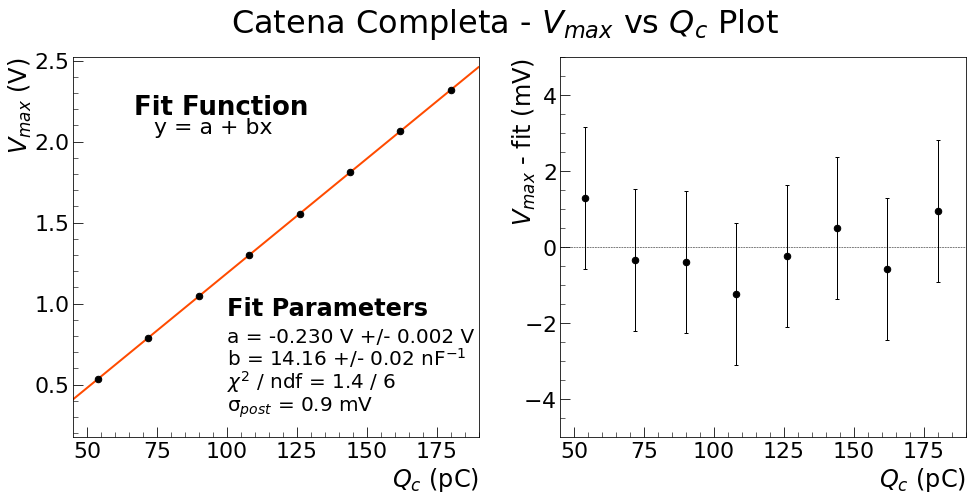

In [50]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# CONSTANTS
XMIN = 45
XMAX = 190
YMIN = 0.35 - 0.176
YMAX = 2.7 - 0.176
RESXMIN = XMIN
RESXMAX = XMAX
#RESYMIN = -0.0075
#RESYMAX = 0.0075
RESYMIN = -0.005 * 1e3
RESYMAX = 0.005 * 1e3
    
# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = CA.lin, xdata = data['charge'], ydata = data['max_values'], sigma=data['err_max_values'], absolute_sigma=True)
func = CA.lin(data['charge'], *par_lin)
# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par_lin)):
    try:
        error.append(np.absolute(cov_lin[i][i])**0.5)
    except:
        error.append( 0.00 )
fit_par = par_lin
fit_err = np.array(error)
a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]
# COMPUTE RESIDUALS
res = (data['max_values'] - func) 
# COMPUTE CHI2
chi2 = np.sum((res/data['err_max_values'])**2)
# COMPUTE SIGMA_POST
sigma_post = np.sqrt( np.sum( res**2 ) / (len(data['charge']) - 2) ) 
# PLOT DATA
ax1.errorbar(data['charge'], data['max_values'], xerr = 0, yerr = data['err_max_values'], color = '#000000', linewidth = 0, marker = '.', markersize = 13, 
            elinewidth=1, capsize = 2,  label = 'Data')
    
# PLOT FIT FUNCTION
ax1.plot(np.arange(XMIN, XMAX, 0.1), CA.lin(np.arange(XMIN, XMAX, 0.1), *par_lin), color = '#FF4B00', linewidth = 2, linestyle = 'solid', label = 'Fit')
#ax1.plot(data['charge'], CA.lin(data['charge'], *par_lin), color = '#FF4B00', linewidth = 2, linestyle = 'solid', label = 'Fit')
    
# DRAW DASHED 'ZERO' LINE
ax2.axhline(color = '#000000', linewidth = 0.5, linestyle = 'dashed')
# DRAW RESIDUALS
ax2.errorbar(data['charge'], res * 1e3, xerr=0, yerr=data['err_max_values'] * 1e3, marker = '.', markersize = 13, 
            elinewidth=1, color = '#000000', linewidth=0, capsize=2, label = 'Residuals')
# PRINT FIT RESULTS ON THE PLOT
q = 'a = ' + format(a, '1.3f') + ' V +/- ' + format(err_a, '1.3f') + ' V'
m = 'b = ' + format(b * 1e3, '1.2f') + ' +/- ' + format(err_b * 1e3, '1.2f') + ' nF$^{-1}$'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(data['charge']) - len(par_lin), '1.0f') 
sigmap = '\u03C3$_{post}$ = ' + format(sigma_post * 1e3, '1.1f') + ' mV'
ax1.text(0.15, 0.85, 'Fit Function', fontsize = 26, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.20, 0.80, 'y = a + bx', fontsize = 22, transform=ax1.transAxes)
ax1.text(0.38, 0.32, 'Fit Parameters', fontsize = 24, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.38, 0.25, q, fontsize = 20, transform=ax1.transAxes)
ax1.text(0.38, 0.19, m, fontsize = 20, transform=ax1.transAxes)
ax1.text(0.38, 0.13, chisq, fontsize = 20, transform=ax1.transAxes)
ax1.text(0.38, 0.07, sigmap, fontsize = 20, transform=ax1.transAxes)
    
# PLOT TITLE
fig.suptitle('Catena Completa - $V_{max}$ vs $Q_{c}$ Plot', fontsize=32)
    
# AXIS LABELS
ax1.set_xlabel('$Q_{c}$ (pC)', fontsize = 24, loc = 'right')
ax1.set_ylabel('$V_{max}$ (V)', fontsize = 24, loc = 'top', labelpad=0)
ax2.set_xlabel('$Q_{c}$ (pC)', fontsize = 24, loc = 'right')
ax2.set_ylabel('$V_{max}$ - fit (mV)', fontsize = 24, loc = 'top', labelpad=-15)
    
# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.yaxis.get_offset_text().set_fontsize(22)
ax2.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
    
# PLOT RANGE
ax1.set_xlim(left = XMIN, right = XMAX)
ax1.set_ylim(bottom = YMIN, top = YMAX)
ax2.set_xlim(left = RESXMIN, right = RESXMAX)
ax2.set_ylim(bottom = RESYMIN, top = RESYMAX)
    
# SAVE FIGURE
#fig.savefig('../Plots/Catena/catena_linearity2.png', dpi = 300, facecolor = 'white')
    
plt.show()

In [39]:
# READ data1 FROM FILE
file_name = '../data/Catena/catena_5us_ROOT.dat'

data1 = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data1.index = np.arange(1, len(data1)+1)

data1.columns = ['time', 'ADC']

SAMPLING = 955000

data1['time (ms)'] = data1['time'] * 1e3 * SAMPLING**-1

data1['V (V)'] = a_calib + b_calib * data1['ADC']

data1['err V (V)'] = 3.3 * 0.58 * 4 / 4096

data1['time (ms)'] = data1['time (ms)'] - 0.929

data1 = data1[(data1['time (ms)'] > 0) & (data1['time (ms)'] < 0.2)]
data1['V (V)'] = data1['V (V)'] - data1['V (V)'].min()

In [40]:
sim = SA.get_sim('../Simulations/Catena/Data/Catena_5us.txt')

sim.columns = ['time (ms)', 'V (V)']

sim['time (ms)'] = 1e3 * sim['time (ms)']

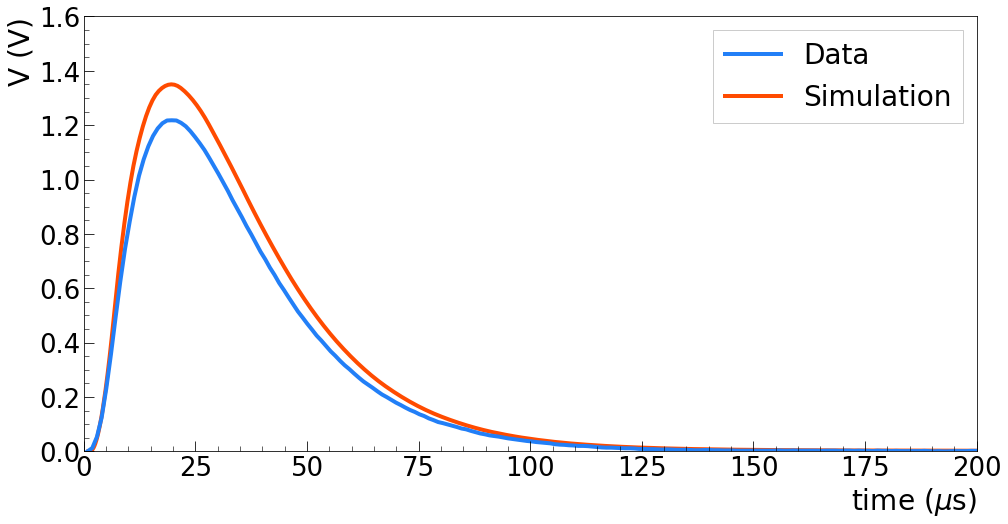

In [27]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(data1['time (ms)'] * 1e3, data1['V (V)'], color = '#227FF7', linewidth = 4, label = 'Data', zorder = 1)
ax1.plot(sim['time (ms)'] * 1e3, sim['V (V)'], color = '#FF4B00', linewidth = 4, label = 'Simulation', zorder = 0)

ax1.set_xlabel('time ($\mu$s)', fontsize = 28, loc = 'right')
ax1.set_ylabel('V (V)', fontsize = 28, loc = 'top')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlim(left = 0, right = 200)
ax1.set_ylim(bottom = 0)

ax1.legend(loc = 'best', prop = {'size': 28}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

#fig.savefig('../Plots/Catena/waveform.png', dpi = 300, facecolor = 'white')
 
plt.show()